# Can this Data be normally distributed ?

Correct question: Has the data been sampled from a distribution that is close to the normal (Gaussian) bell curve?

Methods to test for normality:
- Graphical: Frequency distributions i.e. Histograms
    - Can easily determine the curve shape
    - Isn't accurate for a smaller sample

- Analytical: Shapiro-Wilk
    - gives a single valued result which can be compared against alpha
    - also not too accurate

Solution: Use a combination of graphical and analytical methods to determine result

Define:
- Null Hypothesis (P > 0.05) = Values **are** sampled from a population that follows a normal distribution
- Alternate Hypothesis (P <= 0.05) = Values **are not** sampled from a population that follows a normal distribution

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import shapiro

In [8]:
# State the file name and sheet name
file_name = 'quest_2.xlsx'
sheet_name = 'Sheet1'

In [3]:
def display_cols(file_name, sheet_name):
    '''
    returns the list of all the columns in a dataframe along with the original dataframe
    '''
    df = pd.read_excel(file_name, sheet_name)

    # specifically for quest_2 data
    # df.rename({'I’ve been feeling optimistic about the future':'OPTIMISM', 
    # 'I’ve been feeling useful':'USEFUL',
    # '\n1 – very dim\xa0 \xa0 4 – very bright\n':'BRIGHT or DIM',
    # '1 – very warm/yellowish\xa0 \xa0 \xa0 4 – very cold /bluish':'YELLOW or BLUE',
    # 'dealing with problems ':'DEALING WITH PROBLEMS',
    # ' thinking clearly': 'THINKING CLEARLY', 
    # '1 – not at all glaring\xa0 \xa0 \xa0 \xa04 – very glaring\n':'GLARING',
    # ' feeling close to other people': 'FEELING CLOSE',
    # 'LIGHTING OVERALL IMPRESSION':'OVERALL IMPRESSION'
    # }, inplace=True, axis=1)

    return df.columns, pd.DataFrame(df)

# printing the dataframe and the columns in it
#print(f"Columns: {list(display_cols(file_name, sheet_name)[0])} \nDataframe: \n{display_cols(file_name, sheet_name)[1]}")



In [4]:
def get_data(df, col_list):
    '''
    returns the required cols from the dataframe along with the data
    '''
    df = pd.DataFrame(df)
    required_df = df.loc[:,col_list].set_index('WEEK NO')
    return pd.DataFrame(required_df), list(required_df.index.unique())

# stating required columns
#col_list = ['WEEK NO', 'SLEEP QUALITY', 'SLEEP EASE', 'LAST 5 MINUTES']
# col_list = ['WEEK NO', 'SLEEP QUALITY', 'SLEEP EASE', 'LAST 5 MINUTES', 'OPTIMISM', 
# 'SLEEP QUALITY WEEK', 'USEFUL', 'BRIGHT or DIM', 'RELAXED', 'YELLOW or BLUE', 'DEALING WITH PROBLEMS', 'THINKING CLEARLY', 
# 'GLARING', 'FEELING CLOSE', 'OVERALL IMPRESSION']

# req_df = get_data(display_cols(file_name, sheet_name)[1], col_list)[0]
# week_nos = get_data(display_cols(file_name, sheet_name)[1], col_list)[1]

In [7]:
file_quest_1 = 'quest_1.xlsx'
file_quest_2 = 'quest_2.xlsx'
sheet_name = 'Sheet1'
first_3_cols = ['WEEK NO', 'SLEEP QUALITY', 'SLEEP EASE', 'LAST 5 MINUTES']


req_df_quest1 = get_data(display_cols(file_quest_1, sheet_name)[1], first_3_cols)[0]
req_df_quest2 = get_data(display_cols(file_quest_2, sheet_name)[1], first_3_cols)[0]

# concat frames
#req_df_quest1and2 = pd.concat([req_df_quest1, req_df_quest2], keys=['quest1', 'quest2']) # for reference
req_df_quest1and2 = pd.concat([req_df_quest1, req_df_quest2]) 
week_nos = get_data(display_cols(file_quest_1, sheet_name)[1], first_3_cols)[1]


26

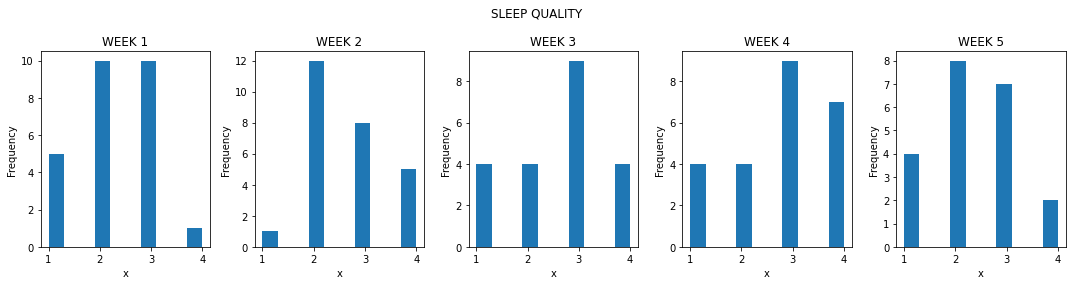

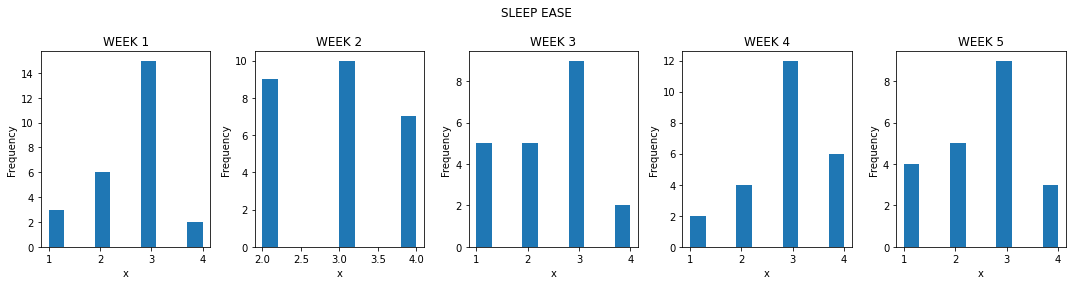

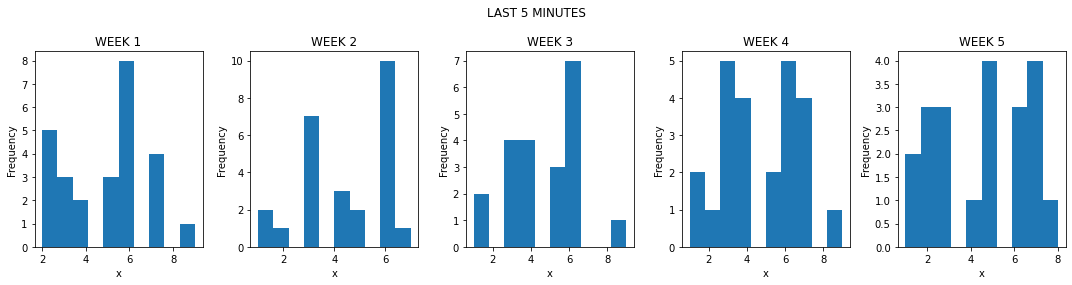

In [35]:
# separate histogram plots
def sep_hist(df, index_vals):
    for col in df:
        fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=len(index_vals))
        fig.suptitle(col)
        i = 0
        for week in index_vals:
            ax[i].set_title(week)
            ax[i].set_xlabel('x')
            ax[i].set_ylabel('Frequency')
            ax[i].hist(np.array(df.loc[df.index == week,col]))
            i += 1
            plt.tight_layout() # adjust size of each plot
        #plt.savefig(file_name.split(".")[0]+"_"+col+".png")
        plt.savefig("quest1and2_"+col+".png")

sep_hist(req_df_quest1and2, week_nos)

In [37]:
# create table of shapiro tests
def shapiro_test_table(df, index_vals):
    shapiro_dict = {}
    #with pd.ExcelWriter(file_name.split(".")[0]+"_shapiro_test.xlsx", engine='xlsxwriter') as writer:
    with pd.ExcelWriter("quest1and2_shapiro_test.xlsx", engine='xlsxwriter') as writer:
        for col in df:
            for week in index_vals:
                shapiro_dict[week] = shapiro(np.array(df.loc[df.index == week,col])).pvalue
            shapiro_df = pd.DataFrame(shapiro_dict, index=['pValue'])            
            shapiro_df.T.to_excel(writer, sheet_name=col)

shapiro_test_table(req_df_quest1and2, week_nos)